In [3]:
import pandas as pd
mental_health = pd.read_csv('/kaggle/input/mental-health/mental_health_dataset.csv')
mental_health.dtypes

age                         int64
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level                int64
sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

## Veri Temizliği: Yinelenen Kayıtları Bulma


In [4]:
ml_duplicates = mental_health.duplicated()
mental_health[ml_duplicates]

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk


## Kategorik Sütunlardaki Eşsiz Değerleri İnceleme

In [5]:
print('gender: ', mental_health['gender'].unique(), "\n")
print('employment_status: ', mental_health['employment_status'].unique(), "\n")
print('work_environment: ', mental_health['work_environment'].unique(), "\n")

gender:  ['Male' 'Female' 'Non-binary' 'Prefer not to say'] 

employment_status:  ['Employed' 'Student' 'Self-employed' 'Unemployed'] 

work_environment:  ['On-site' 'Remote' 'Hybrid'] 



In [6]:
print('gender: ', mental_health['gender'].unique(), "\n")
print('employment_status: ', mental_health['employment_status'].unique(), "\n")
print('work_environment: ', mental_health['work_environment'].unique(), "\n")

gender:  ['Male' 'Female' 'Non-binary' 'Prefer not to say'] 

employment_status:  ['Employed' 'Student' 'Self-employed' 'Unemployed'] 

work_environment:  ['On-site' 'Remote' 'Hybrid'] 



## Görselleştirme: Stres Seviyesi ve Mental Sağlık Riski

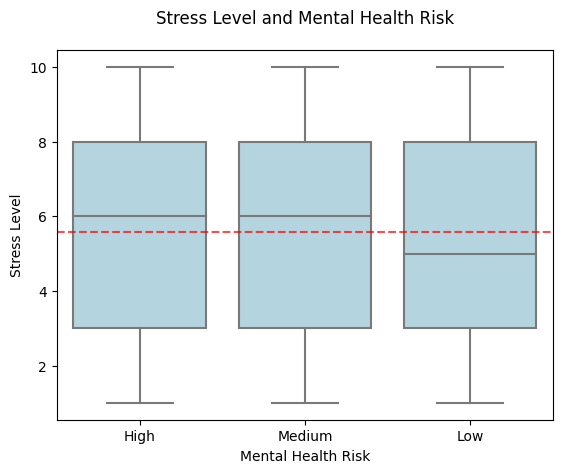

stress_level
1      955
2     1012
3      940
4     1027
5      995
6      965
7      997
8      995
9     1031
10    1083
Name: depression_score, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='mental_health_risk', y='stress_level', data=mental_health, color='lightblue')
plt.title('Stress Level and Mental Health Risk', y=1.05)
plt.xlabel('Mental Health Risk')
plt.ylabel('Stress Level')
average_stress = mental_health['stress_level'].mean()
plt.axhline(y=average_stress, color='r', linestyle='--', label='Overall Average', alpha=0.7)
plt.show()
stress = mental_health.groupby('stress_level')['depression_score'].count()
print(stress)


## Sosyal Destek Skoru ve Yaş İlişkisi

Text(0.5, 0, 'Social Support Score')

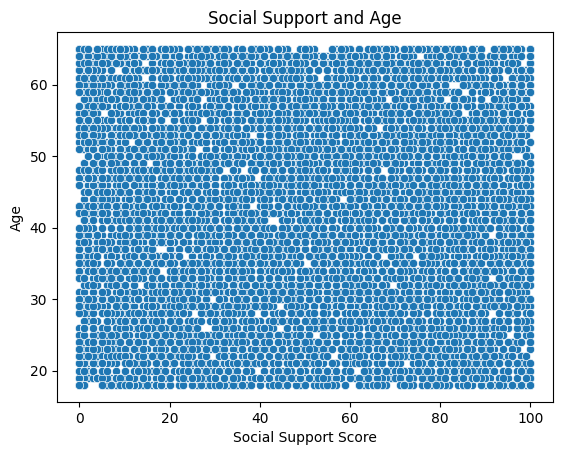

In [8]:
sns.scatterplot(x="social_support_score", y="age", data=mental_health)
plt.title('Social Support and Age')
plt.ylabel('Age')
plt.xlabel('Social Support Score')

##  İstihdam Durumuna Göre Ortalama Depresyon Skoru


employment_status
Employed         15.061691
Self-employed    14.821053
Student          15.165443
Unemployed       14.890805
Name: depression_score, dtype: float64


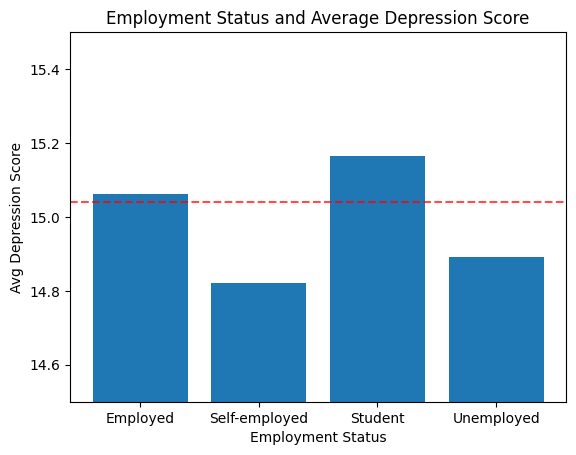

In [9]:
employment_grouped = mental_health.groupby('employment_status')['depression_score'].mean()
plt.bar(employment_grouped.index,employment_grouped.values)
plt.ylim(14.5, 15.5)
plt.title('Employment Status and Average Depression Score')
plt.ylabel('Avg Depression Score')
plt.xlabel('Employment Status')
avg_depression = mental_health['depression_score'].mean()
plt.axhline(y=avg_depression, color='r', linestyle='--', label='Overall Average', alpha=0.7)
print(employment_grouped)

## Tedavi Arama Durumu ve Yaşın Kutup Grafiği



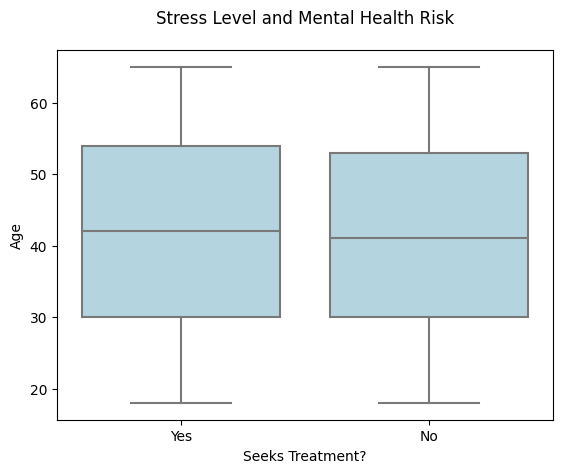

In [10]:
sns.boxplot(x='seeks_treatment', y='age', data=mental_health, color='lightblue')
plt.title('Stress Level and Mental Health Risk', y=1.05)
plt.xlabel('Seeks Treatment?')
plt.ylabel('Age')
plt.show()

## Mental Sağlık Riski ile Fiziksel Aktivite İlişkisi

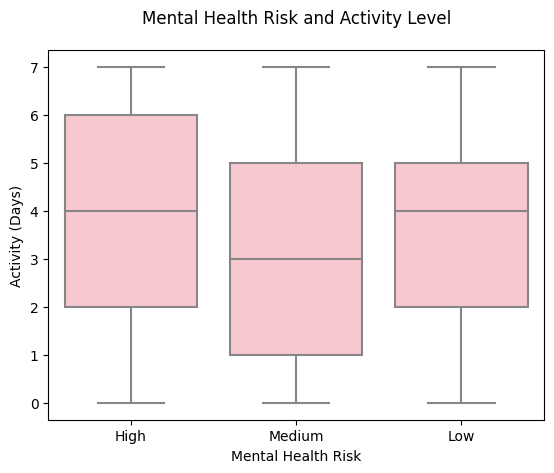

In [11]:
sns.boxplot(x='mental_health_risk', y='physical_activity_days', data=mental_health, color='pink')
plt.title('Mental Health Risk and Activity Level', y=1.05)
plt.xlabel('Mental Health Risk')
plt.ylabel('Activity (Days)')
plt.show()

##  Cinsiyete Göre Ortalama Depresyon Skoru


gender
Female               15.039937
Male                 15.097433
Non-binary           14.776923
Prefer not to say    14.770386
Name: depression_score, dtype: float64


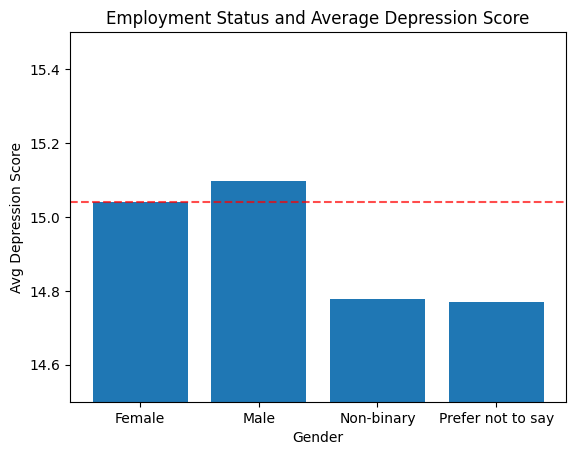

In [12]:
gender_grouped = mental_health.groupby('gender')['depression_score'].mean()
plt.bar(gender_grouped.index,gender_grouped.values)
plt.ylim(14.5, 15.5)
plt.title('Employment Status and Average Depression Score')
plt.ylabel('Avg Depression Score')
plt.xlabel('Gender')
avg_depression = mental_health['depression_score'].mean()
plt.axhline(y=avg_depression, color='r', linestyle='--', label='Overall Average', alpha=0.7)
print(gender_grouped)

## Cinsiyete Göre Ortalama Anksiyete Skoru

gender
Female               10.473637
Male                 10.584815
Non-binary           10.863462
Prefer not to say    10.843348
Name: anxiety_score, dtype: float64


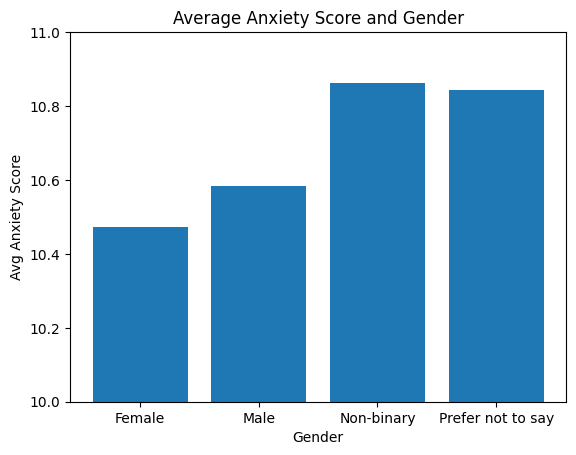

In [13]:
gender_anx_grouped = mental_health.groupby('gender')['anxiety_score'].mean()
plt.bar(gender_anx_grouped.index,gender_anx_grouped.values)
plt.ylim(10, 11)
plt.title('Average Anxiety Score and Gender')
plt.ylabel('Avg Anxiety Score')
plt.xlabel('Gender')
avg_depression = mental_health['depression_score'].mean()
plt.axhline(y=avg_depression, color='r', linestyle='--', label='Overall Average', alpha=0.7)
print(gender_anx_grouped)

## Mental Sağlık Riski ve Üretkenlik İlişkisi

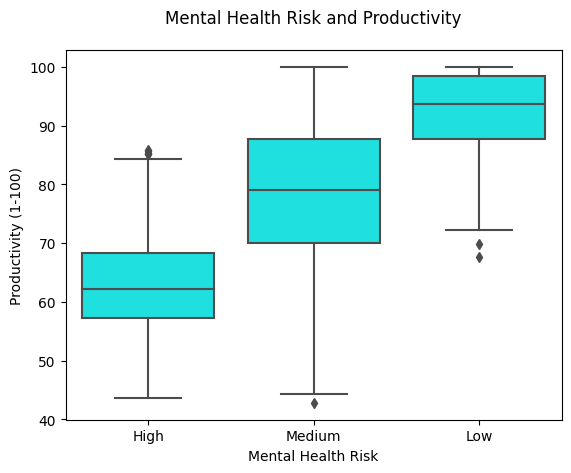

In [14]:
sns.boxplot(x='mental_health_risk', y='productivity_score', data=mental_health, color='cyan')
plt.title('Mental Health Risk and Productivity', y=1.05)
plt.xlabel('Mental Health Risk')
plt.ylabel('Productivity (1-100)')
plt.show()

## Yaş Dağılımı Histogramı

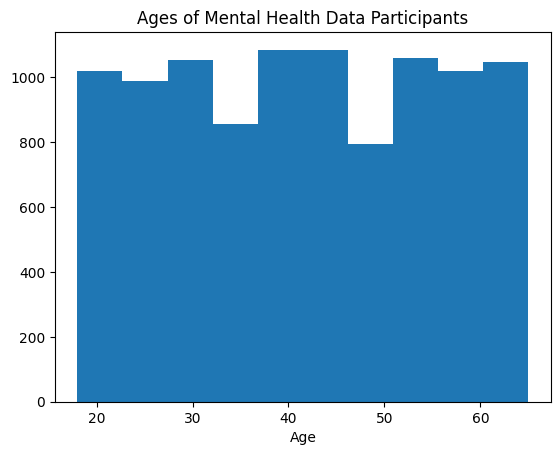

In [15]:
plt.hist(mental_health['age'])
plt.title('Ages of Mental Health Data Participants')
plt.xlabel('Age')
plt.show()

 ## Kategorik Değişkenlerin One-Hot Encoding ile Dönüştürülmesi

In [20]:
mental_dummies = pd.get_dummies(mental_health['gender'], drop_first=True)
mental_dummies = pd.concat([mental_health, mental_dummies], axis=1)
mental_dummies = mental_dummies.drop('gender', axis=1)

mental_dummies1 = pd.get_dummies(mental_dummies['employment_status'], drop_first=True)
mental_dummies1 = pd.concat([mental_dummies, mental_dummies1], axis=1)
mental_dummies1 = mental_dummies1.drop('employment_status', axis=1)

mental_dummies2 = pd.get_dummies(mental_dummies1['mental_health_history'], drop_first=True)
mental_dummies2 = pd.concat([mental_dummies1, mental_dummies2], axis=1)
mental_dummies2 = mental_dummies2.drop('mental_health_history', axis=1)

mental_dummies3 = pd.get_dummies(mental_dummies2['work_environment'], drop_first=True)
mental_dummies3 = pd.concat([mental_dummies2, mental_dummies3], axis=1)
mental_dummies3 = mental_dummies3.drop('work_environment', axis=1)

mental_dummies4 = pd.get_dummies(mental_dummies3['seeks_treatment'], drop_first=True)
mental_dummies4 = pd.concat([mental_dummies3, mental_dummies4], axis=1)
mental_dummies4 = mental_dummies4.drop('seeks_treatment', axis=1)

print(mental_dummies4.head())

   age  stress_level  sleep_hours  physical_activity_days  depression_score  \
0   56             6          6.2                       3                28   
1   46            10          9.0                       4                30   
2   32             7          7.7                       2                24   
3   60             4          4.5                       4                 6   
4   25             3          5.4                       0                24   

   anxiety_score  social_support_score  productivity_score mental_health_risk  \
0             17                    54                59.7               High   
1             11                    85                54.9               High   
2              7                    62                61.3             Medium   
3              0                    95                97.0                Low   
4             12                    70                69.0               High   

    Male  Non-binary  Prefer not to sa

## Model İçin Veri Hazırlığı: Özellik ve Hedef Değişkenlerin Belirlenmesi

In [23]:
X = mental_dummies4.drop('mental_health_risk', axis=1)
y = mental_dummies4['mental_health_risk']

## Veri Setinin Eğitim ve Test Olarak Bölünmesi

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Özelliklerin Standardizasyonu (Ölçeklendirme)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  KNN (K-Nearest Neighbors) Sınıflandırması

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


## Model Doğruluğunun Hesaplanması

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.786


## Çoklu Sınıflı Lojistik Regresyon Modeli

In [31]:
from sklearn.linear_model import LogisticRegression
multi_logreg = LogisticRegression(multi_class='multinomial',
                                  solver='lbfgs')
multi_logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

## Çoklu Sınıflı Lojistik Regresyon Modeli

In [33]:
y_pred_multi = multi_logreg.predict(X_test)
print('MultiLG accuracy:',
      accuracy_score(y_test, y_pred_multi))

MultiLG accuracy: 0.9995
